## **Summary Statistics by Country**

In [17]:
import pandas as pd

file_path = "/content/forcleaning_statistical_indicators.csv"  # Update if necessary
df_stat = pd.read_csv(file_path)

df_stat.head()


,country_code,year,BroadMoney_Ratio,Classification_HouseholdConsumption,Classification_NationalIndustry,Classification_StatusofEmployment,GovernmentFinance_Stats,MonetaryandFinancial_Stats,OfficialExchangeRate,id,country_name,region
0,AFE,2021,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Africa Eastern and Southern,Region Summary
1,AFE,2022,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Africa Eastern and Southern,Region Summary
2,AFE,2023,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Africa Eastern and Southern,Region Summary
3,AFW,2021,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Africa Western and Central,Region Summary
4,AFW,2022,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Africa Western and Central,Region Summary


**Check the data types and missing values**

**Some classification indicators have 147 missing values**

In [5]:
missing_values = df_stat.isnull().sum()

data_types = df_stat.dtypes

print("Missing Values per Column:")
print(missing_values)

print("Data Types per Column:")
print(data_types)


Missing Values per Column:
country_code                             0
year                                     0
BroadMoney_Ratio                         0
Classification_HouseholdConsumption    147
Classification_NationalIndustry        147
Classification_StatusofEmployment      147
GovernmentFinance_Stats                147
MonetaryandFinancial_Stats             147
OfficialExchangeRate                     0
id                                     798
country_name                             0
region                                   0
dtype: int64
Data Types per Column:
country_code                            object
year                                     int64
BroadMoney_Ratio                       float64
Classification_HouseholdConsumption    float64
Classification_NationalIndustry        float64
Classification_StatusofEmployment      float64
GovernmentFinance_Stats                float64
MonetaryandFinancial_Stats             float64
OfficialExchangeRate                   float6

In [6]:
# Numerical columns
numeric_cols = df_stat.select_dtypes(include=['float64', 'int64']).columns

df_stat[numeric_cols].describe()


,year,BroadMoney_Ratio,Classification_HouseholdConsumption,Classification_NationalIndustry,Classification_StatusofEmployment,GovernmentFinance_Stats,MonetaryandFinancial_Stats,OfficialExchangeRate,id
count,798.000000,798.000000,651.000000,651.000000,651.000000,651.000000,651.000000,798.000000,0.0
mean,2022.000000,2.061742,0.795699,0.603687,0.755760,0.377112,0.777266,621.035652,NaN
std,0.817009,4.769771,0.403500,0.412779,0.429966,0.437948,0.416401,3312.876729,NaN
min,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2021.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.746433,NaN
50%,2022.000000,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000,2.700000,NaN
75%,2023.000000,2.636923,1.000000,1.000000,1.000000,1.000000,1.000000,81.600580,NaN
max,2023.000000,43.141004,1.000000,1.000000,1.000000,1.000000,1.000000,42000.000000,NaN


In [10]:
df_stat.drop(columns=["id"], inplace=True)

print("'id' column removed successfully!")


'id' column removed successfully!


## **Preprocessing for Indicators: Classification and Government Finance Stats**

**Remove 147 rows with missing values**

In [11]:
df_stat_cleaned = df_stat.dropna()

df_stat_cleaned.reset_index(drop=True, inplace=True)

print(f"Removed {df_stat.shape[0] - df_stat_cleaned.shape[0]} rows with missing values.")
print(f"New dataset now has {df_stat_cleaned.shape[0]} rows.")


Removed 147 rows with missing values.
New dataset now has 651 rows.


In [12]:
numeric_cols = df_stat_cleaned.select_dtypes(include=['float64', 'int64']).columns

print("Numerical Columns in Statistical Indicators Table:")
print(numeric_cols.tolist())


Numerical Columns in Statistical Indicators Table:
['year', 'BroadMoney_Ratio', 'Classification_HouseholdConsumption', 'Classification_NationalIndustry', 'Classification_StatusofEmployment', 'GovernmentFinance_Stats', 'MonetaryandFinancial_Stats', 'OfficialExchangeRate']


In [13]:
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers[["country_name", "region", column]]

outlier_results = {}

for col in numeric_cols:
    outliers = detect_outliers_iqr(df_stat_cleaned, col)
    if not outliers.empty:
        outlier_results[col] = outliers

for col, data in outlier_results.items():
    print(f"Outliers in '{col}':")
    display(data)


Outliers in 'BroadMoney_Ratio':


,country_name,region,BroadMoney_Ratio
53,Equatorial Guinea,Sub-Saharan Africa,31.894444
121,Chad,Sub-Saharan Africa,12.745807
147,Argentina,Latin America and the Caribbean,10.079877
152,Burundi,Sub-Saharan Africa,11.924575
153,Burundi,Sub-Saharan Africa,16.712687
157,Bolivia,Latin America and the Caribbean,8.741695
322,Pakistan,South Asia,7.831917
323,Pakistan,South Asia,17.418813
324,Pakistan,South Asia,10.477162
408,Zimbabwe,Sub-Saharan Africa,10.307738


Outliers in 'Classification_HouseholdConsumption':


,country_name,region,Classification_HouseholdConsumption
0,Aruba,Latin America and the Caribbean,0.0
1,Aruba,Latin America and the Caribbean,0.0
2,Aruba,Latin America and the Caribbean,0.0
3,Andorra,Europe and Central Asia,0.0
4,Andorra,Europe and Central Asia,0.0
...,...,...,...
588,Malta,Middle East and North Africa,0.0
589,Malta,Middle East and North Africa,0.0
610,Romania,Europe and Central Asia,0.0
611,Romania,Europe and Central Asia,0.0


Outliers in 'Classification_StatusofEmployment':


,country_name,region,Classification_StatusofEmployment
0,Aruba,Latin America and the Caribbean,0.0
1,Aruba,Latin America and the Caribbean,0.0
2,Aruba,Latin America and the Caribbean,0.0
5,American Samoa,East Asia and Pacific,0.0
6,American Samoa,East Asia and Pacific,0.0
...,...,...,...
463,Equatorial Guinea,Sub-Saharan Africa,0.0
601,Palau,East Asia and Pacific,0.0
602,Palau,East Asia and Pacific,0.0
616,Saudi Arabia,Middle East and North Africa,0.0


Outliers in 'MonetaryandFinancial_Stats':


,country_name,region,MonetaryandFinancial_Stats
0,Aruba,Latin America and the Caribbean,0.0
1,Aruba,Latin America and the Caribbean,0.0
2,Aruba,Latin America and the Caribbean,0.0
3,Andorra,Europe and Central Asia,0.0
4,Andorra,Europe and Central Asia,0.0
...,...,...,...
616,Saudi Arabia,Middle East and North Africa,0.0
617,Saudi Arabia,Middle East and North Africa,0.0
619,Singapore,East Asia and Pacific,0.0
620,Singapore,East Asia and Pacific,0.0


Outliers in 'OfficialExchangeRate':


,country_name,region,OfficialExchangeRate
17,"Congo, Rep.",Sub-Saharan Africa,554.530675
18,"Congo, Rep.",Sub-Saharan Africa,623.759701
19,"Congo, Rep.",Sub-Saharan Africa,606.569750
20,Comoros,Sub-Saharan Africa,415.955849
21,Comoros,Sub-Saharan Africa,467.184261
...,...,...,...
576,"Korea, Rep.",East Asia and Pacific,1305.662500
637,Uganda,Sub-Saharan Africa,3726.140460
645,Uzbekistan,Europe and Central Asia,10609.464390
646,Uzbekistan,Europe and Central Asia,11050.145420


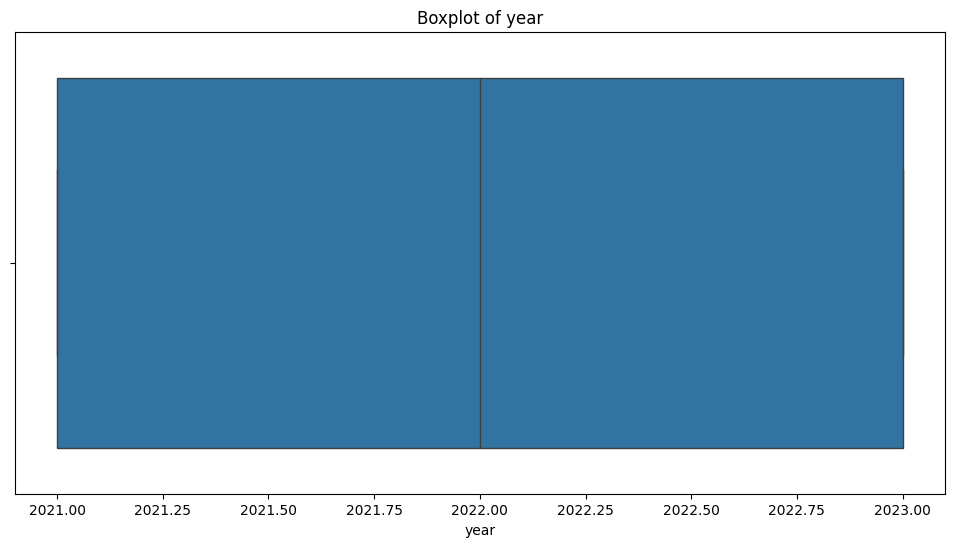

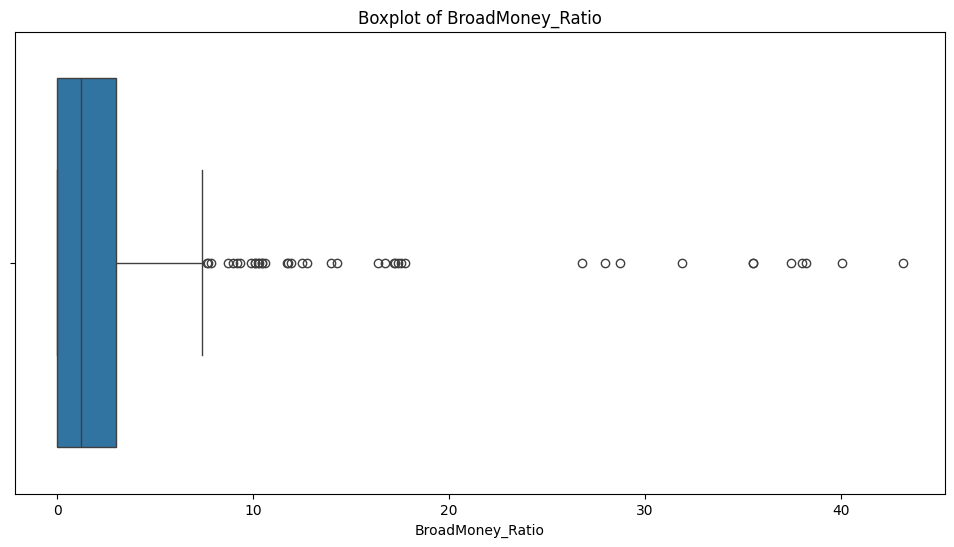

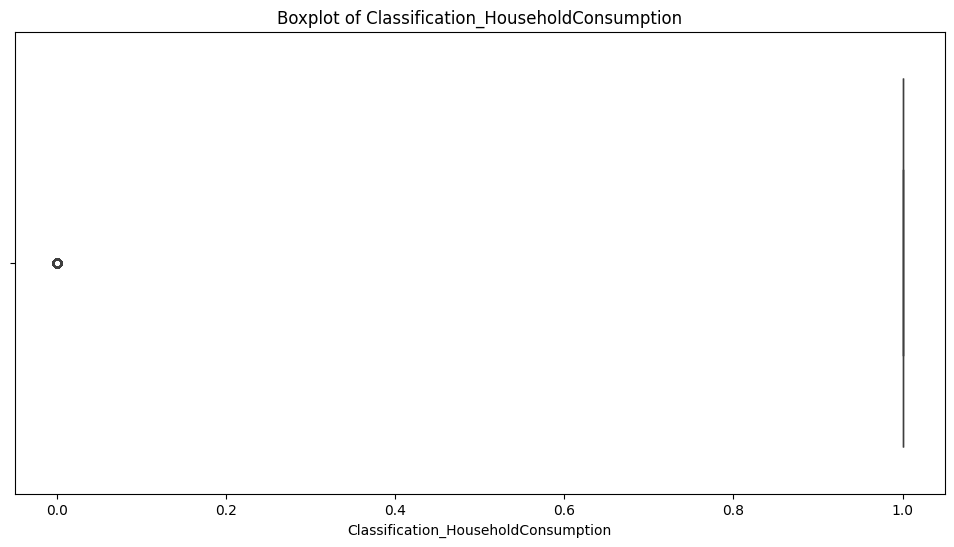

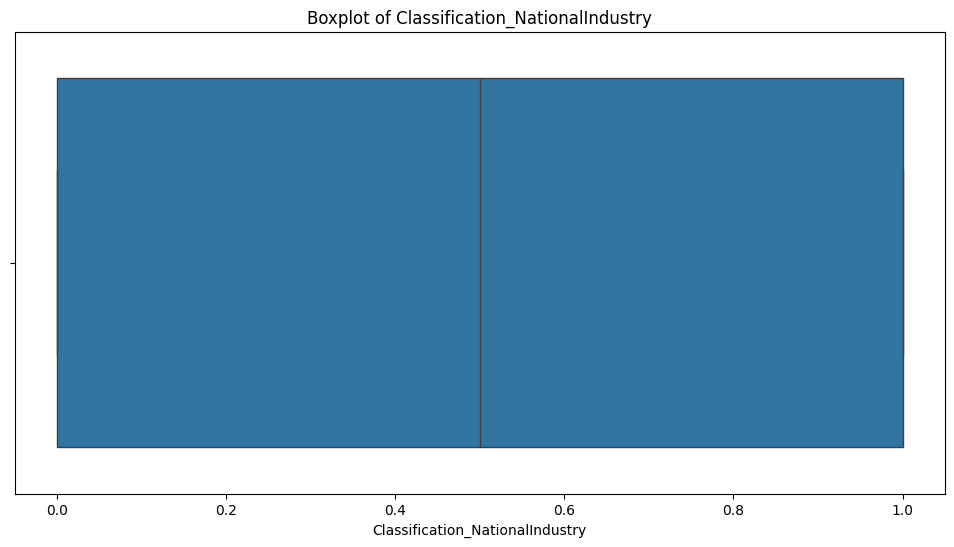

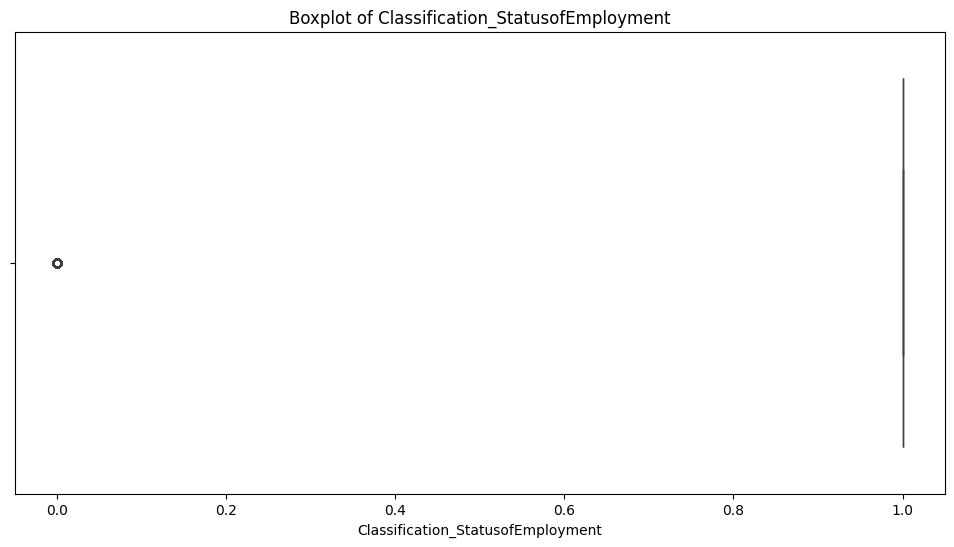

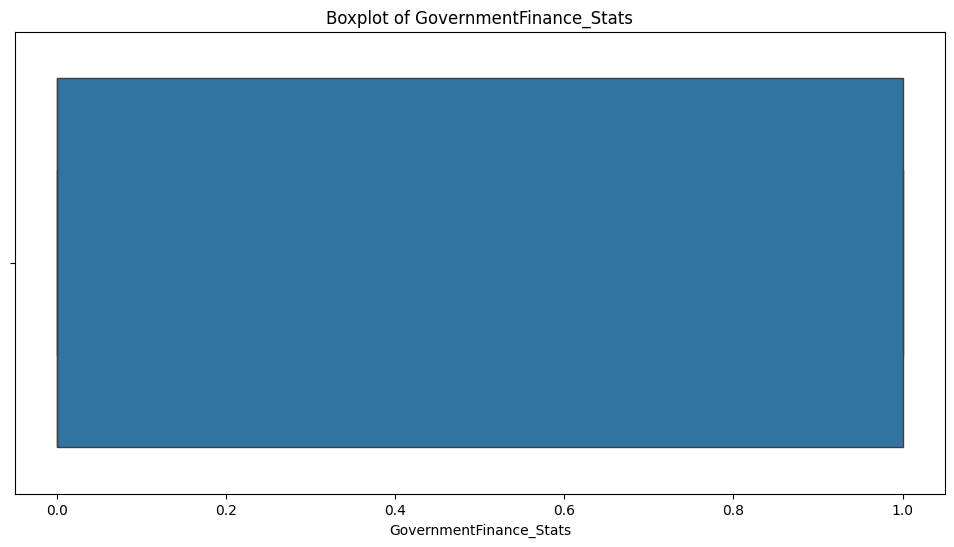

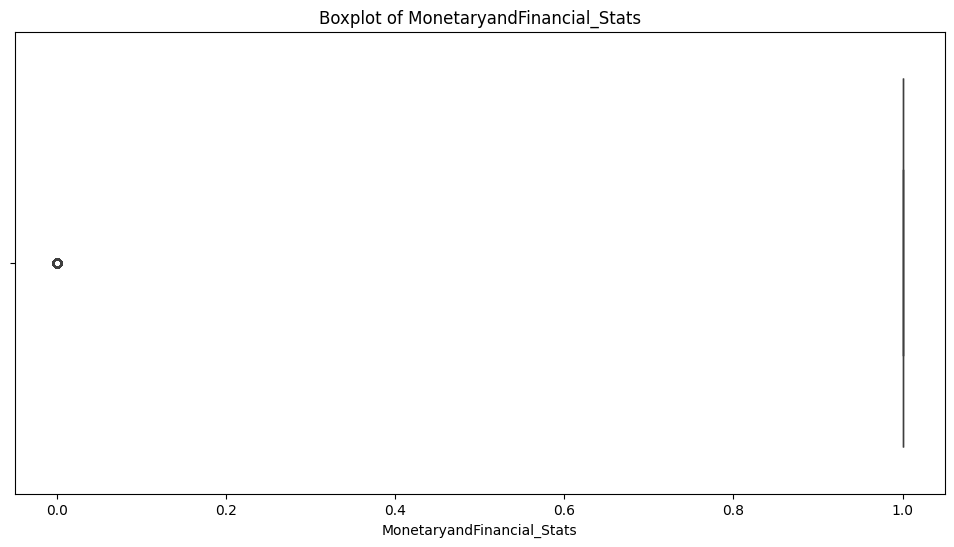

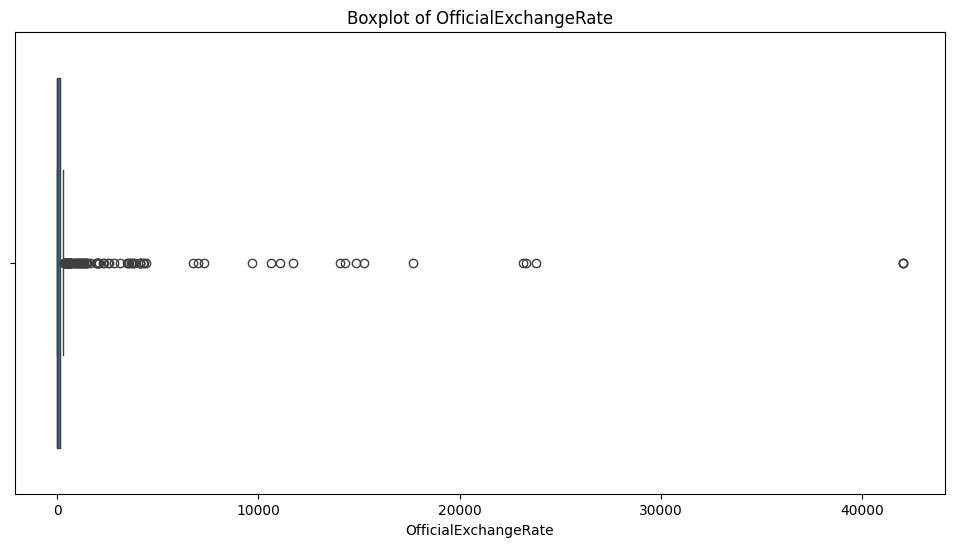

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot(data, column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.show()

for col in numeric_cols:
    plot_boxplot(df_stat_cleaned, col, f"Boxplot of {col}")


**The box plots above lead us to believe there are binary columns, so we'll check for unique values in the suspected columns**

In [16]:
binary_columns = [
    "Classification_HouseholdConsumption",
    "Classification_NationalIndustry",
    "Classification_StatusofEmployment",
    "GovernmentFinance_Stats",
    "MonetaryandFinancial_Stats"
]

for col in binary_columns:
    unique_vals = df_stat_cleaned[col].unique()
    print(f"Unique values in '{col}': {unique_vals}")


Unique values in 'Classification_HouseholdConsumption': [0. 1.]
Unique values in 'Classification_NationalIndustry': [0.  0.5 1. ]
Unique values in 'Classification_StatusofEmployment': [0. 1.]
Unique values in 'GovernmentFinance_Stats': [0.  0.5 1. ]
Unique values in 'MonetaryandFinancial_Stats': [0. 1.]


## **Preprocessing for Indicators: BroadMoney_Ratio and OfficialExchangeRate**

In [18]:
# Summary statistics for Broad Money Ratio & Official Exchange Rate
df_stat_cleaned[["BroadMoney_Ratio", "OfficialExchangeRate"]].describe()


,BroadMoney_Ratio,OfficialExchangeRate
count,651.000000,651.000000
mean,2.527296,761.265331
std,5.168895,3653.807805
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.196412,7.076152
75%,2.999043,128.802705
max,43.141004,42000.000000


In [20]:
outliers_broadmoney = detect_outliers_iqr(df_stat_cleaned, "BroadMoney_Ratio")
outliers_exchange = detect_outliers_iqr(df_stat_cleaned, "OfficialExchangeRate")

print("Outliers in Broad Money Ratio:")
display(outliers_broadmoney)

print("Outliers in Official Exchange Rate:")
display(outliers_exchange)


Outliers in Broad Money Ratio:


,country_name,region,BroadMoney_Ratio
53,Equatorial Guinea,Sub-Saharan Africa,31.894444
121,Chad,Sub-Saharan Africa,12.745807
147,Argentina,Latin America and the Caribbean,10.079877
152,Burundi,Sub-Saharan Africa,11.924575
153,Burundi,Sub-Saharan Africa,16.712687
157,Bolivia,Latin America and the Caribbean,8.741695
322,Pakistan,South Asia,7.831917
323,Pakistan,South Asia,17.418813
324,Pakistan,South Asia,10.477162
408,Zimbabwe,Sub-Saharan Africa,10.307738


Outliers in Official Exchange Rate:


,country_name,region,OfficialExchangeRate
17,"Congo, Rep.",Sub-Saharan Africa,554.530675
18,"Congo, Rep.",Sub-Saharan Africa,623.759701
19,"Congo, Rep.",Sub-Saharan Africa,606.569750
20,Comoros,Sub-Saharan Africa,415.955849
21,Comoros,Sub-Saharan Africa,467.184261
...,...,...,...
576,"Korea, Rep.",East Asia and Pacific,1305.662500
637,Uganda,Sub-Saharan Africa,3726.140460
645,Uzbekistan,Europe and Central Asia,10609.464390
646,Uzbekistan,Europe and Central Asia,11050.145420


**Both columns have many outliers, as indicated by the boxplots below. Next, we will handle these values by capping extreme values**

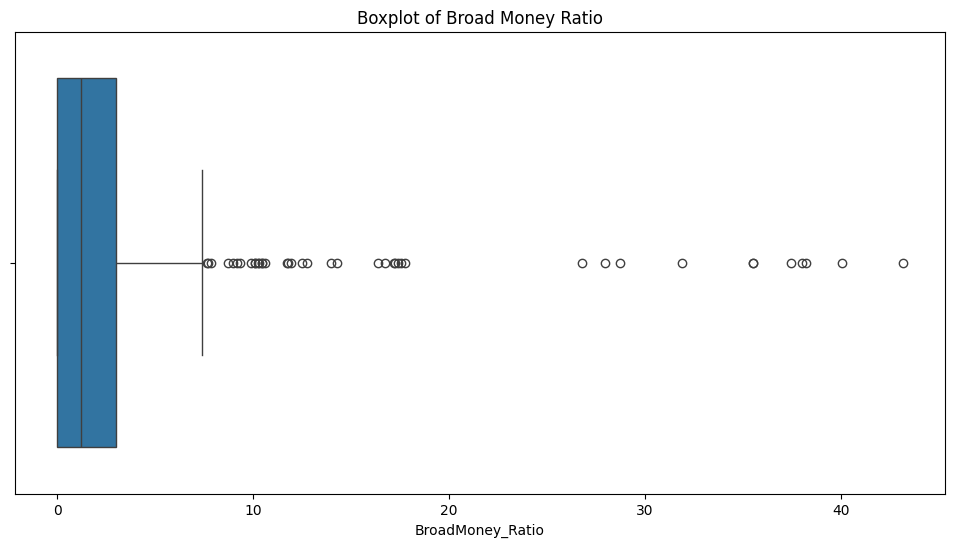

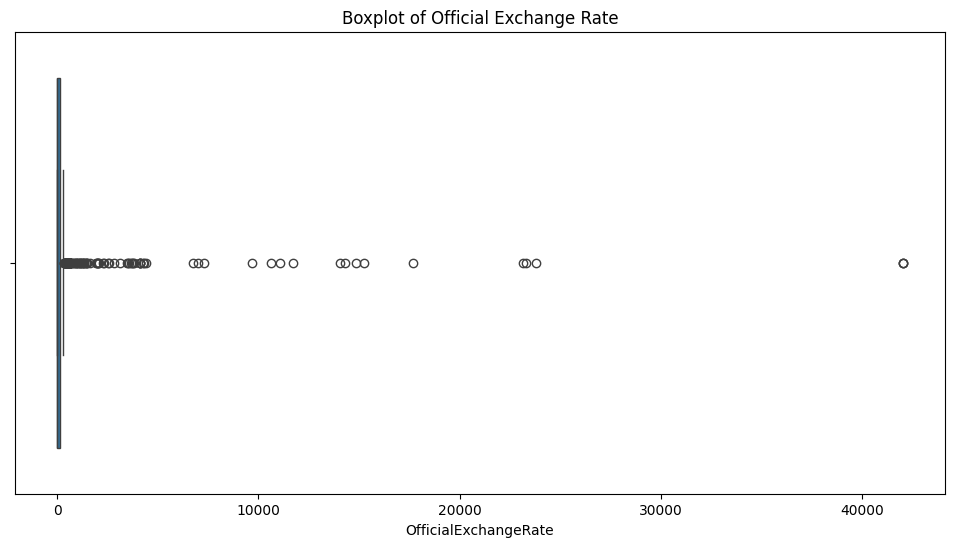

In [21]:
def plot_boxplot(data, column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.show()

plot_boxplot(df_stat_cleaned, "BroadMoney_Ratio", "Boxplot of Broad Money Ratio")
plot_boxplot(df_stat_cleaned, "OfficialExchangeRate", "Boxplot of Official Exchange Rate")


**We don't want to remove/transform an excessive amount of the total data, so we will cap extreme values at the 95th percentile to keep data realistic without removing too much data**

In [23]:
# Calculate the 95th percentile for both indicators
broadmoney_cap = df_stat_cleaned["BroadMoney_Ratio"].quantile(0.95)
exchange_cap = df_stat_cleaned["OfficialExchangeRate"].quantile(0.95)

# Cap values at the 95th percentile
df_stat_cleaned["BroadMoney_Ratio"] = df_stat_cleaned["BroadMoney_Ratio"].clip(upper=broadmoney_cap)
df_stat_cleaned["OfficialExchangeRate"] = df_stat_cleaned["OfficialExchangeRate"].clip(upper=exchange_cap)

print(f"Broad Money Ratio capped at: {broadmoney_cap}")
print(f"Official Exchange Rate capped at: {exchange_cap}")


Broad Money Ratio capped at: 9.456492818
Official Exchange Rate capped at: 2922.13593225


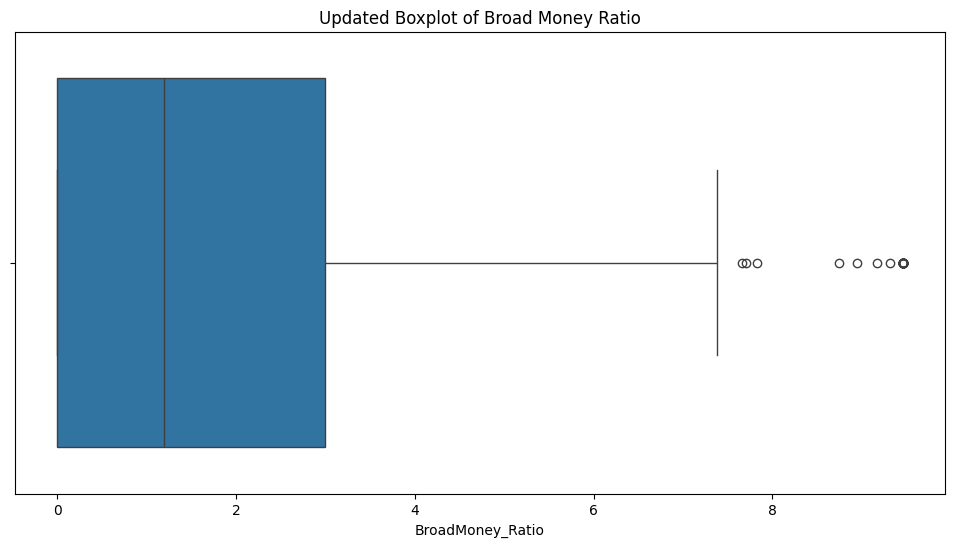

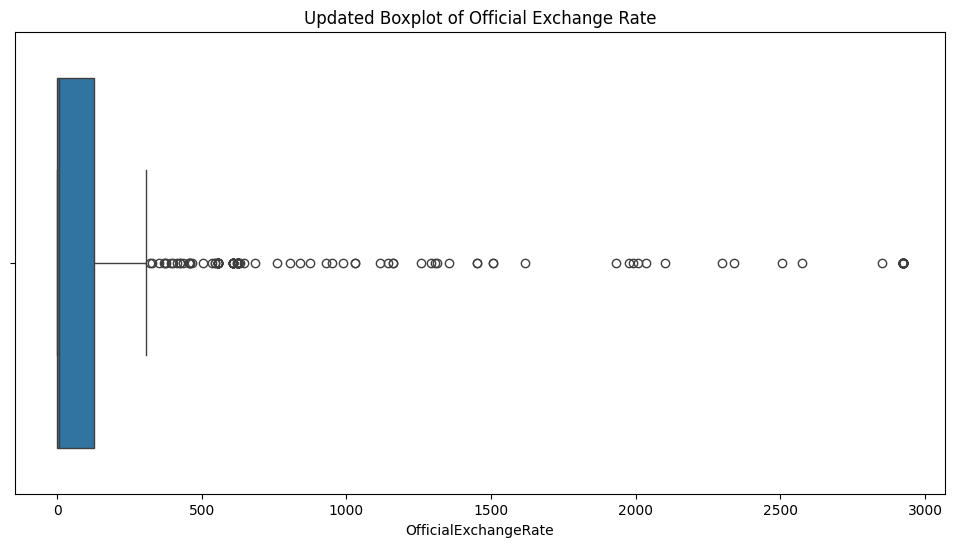

In [24]:
# Generate updated box plots
plot_boxplot(df_stat_cleaned, "BroadMoney_Ratio", "Updated Boxplot of Broad Money Ratio")
plot_boxplot(df_stat_cleaned, "OfficialExchangeRate", "Updated Boxplot of Official Exchange Rate")


## **Final Summary Statistics Post-Cleaning: Statistical_Indicators Table**

In [27]:
summary_stats_stat = df_stat_cleaned.describe()

print("Summary Statistics for Cleaned Statistical Indicators Data:")
display(summary_stats_stat)


Summary Statistics for Cleaned Statistical Indicators Data:


,year,BroadMoney_Ratio,Classification_HouseholdConsumption,Classification_NationalIndustry,Classification_StatusofEmployment,GovernmentFinance_Stats,MonetaryandFinancial_Stats,OfficialExchangeRate
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,2022.000000,1.970524,0.795699,0.603687,0.755760,0.377112,0.777266,303.266816
std,0.817124,2.561569,0.403500,0.412779,0.429966,0.437948,0.416401,715.370297
min,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,2022.000000,1.196412,1.000000,0.500000,1.000000,0.000000,1.000000,7.076152
75%,2023.000000,2.999043,1.000000,1.000000,1.000000,1.000000,1.000000,128.802705
max,2023.000000,9.456493,1.000000,1.000000,1.000000,1.000000,1.000000,2922.135932


##**Export cleaned table to .csv**

In [28]:
export_path = "/content/cleaned_statistical_indicators.csv"

df_stat_cleaned.to_csv(export_path, index=False)

print(f"Cleaned dataset saved as: {export_path}")

Cleaned dataset saved as: /content/cleaned_statistical_indicators.csv
